In [6]:
import os, glob
from os import makedirs, path as op

import imgaug.augmenters as iaa
import cv2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import shutil

In [83]:
def aug_img(image):
    aug = iaa.Sequential([iaa.WithBrightnessChannels(iaa.Add((50, 50))), 
                          iaa.GaussianBlur(sigma=(1.0, 3.0)),
                          iaa.RemoveSaturation(0.3),
                          iaa.MultiplySaturation((0.5, 1.5)),
                          iaa.ChangeColorTemperature((4000, 4000)), ])
    seq_det = aug.to_deterministic()
    
    m,work_station, lm, data,zooms, region, tiles, img = image.split("/")
    print(img)
    im = cv2.imread(image)
    print(im.shape)
    
    im_aug = seq_det.augment_image(im)
    img_name=op.basename(img)
    print(img_name)
    image_path = op.join(m, work_station,lm,data,f'{zooms}_auged_enhanced', region, tiles)
    if not op.isdir(image_path):
        makedirs(image_path)
    cv2.imwrite(op.join(image_path,img_name), im_aug)

In [84]:
regions = ['aus', 'china', 'euro_p1', 'euro_p2', 'euro_p3', 'central_americal_p1', 'central_americal_p3', 
           'central_americal_p5', 'central_americal_p6', 'central_americal_p7', 'central_americal_p8',
          'central_americal_p9', 'asia_p1', 'asia_p2', 'asia_p3', 'asia_p4', 'asia_p5']
zooms = ['color_enhanced_warm_z16', 'color_enhanced_warm_z15']

In [85]:
work_dir = "../work_station_covid_ml/label-maker/data"

In [ ]:
for zoom in zooms:
    for region in regions:
        images = glob.glob(op.join(work_dir, zoom, region, 'tiles') +"/*.jpg")
        print(len(images))
        for img in images:
            print(img)
            aug_img(img)
            

In [88]:
# run through multiple zoom level tiles
for zoom in zooms:
    for region in regions:
        images = glob.glob(op.join(work_dir, zoom, region, 'tiles') +"/*.jpg")
        for img_ in images:
            m,work_station, lm, data,zooms, region, tiles, img = img_.split("/")
            labe_path = op.join( m,work_station, lm, data,zooms, region, 'labels.npz')
            new_label_path = op.join( m,work_station, lm, data,f'{zooms}_auged_enhanced', region, 'labels.npz')
            shutil.copy(labe_path, new_label_path)
            

In [77]:

aug = iaa.Sequential([iaa.WithBrightnessChannels(iaa.Add((50, 50))), 
                      iaa.GaussianBlur(sigma=(1.0, 3.0)),
                      iaa.RemoveSaturation(0.3),
                      iaa.MultiplySaturation((0.5, 1.5)),
                      iaa.ChangeColorTemperature((2000, 4000)), ])

In [78]:
seq_det = aug.to_deterministic()

In [79]:
img_path ="../work_station_covid_ml/label-maker/data/color_enhanced_warm_z16/china/tiles/54662-28539-16.jpg"
im = cv2.imread(img_path)

In [80]:
im.shape

(256, 256, 3)

In [81]:
im_aug = seq_det.augment_image(im)

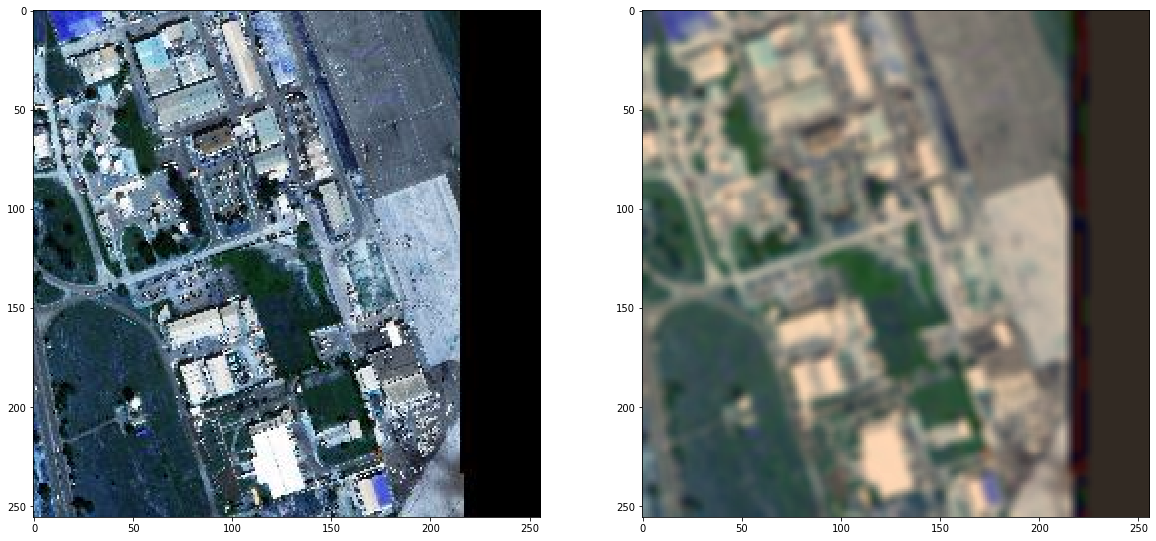

In [13]:
#plot tiles in China for visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im)
ax2.imshow(im_aug)
plt.show()

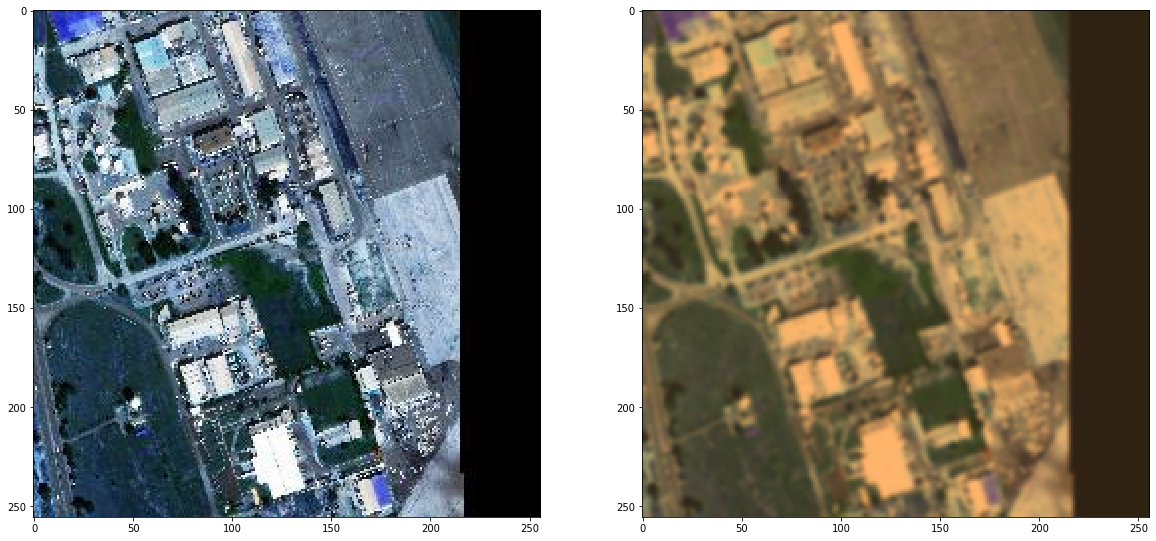

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im)
ax2.imshow(im_aug)
plt.show()
